In [ ]:
from problem2 import *

In [2]:
video_path = '/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/video/1.mp4'
video = read_video_to_tensor(video_path, frame_step=5, max_frame=250)

In [3]:
print(f"Video shape: {video.shape}")

Video shape: torch.Size([50, 3, 1080, 1920])


28929 Black Pixels,  844 Segments.


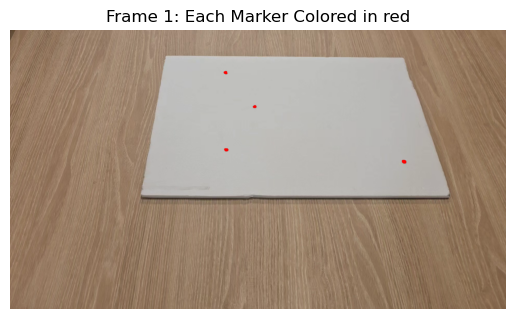

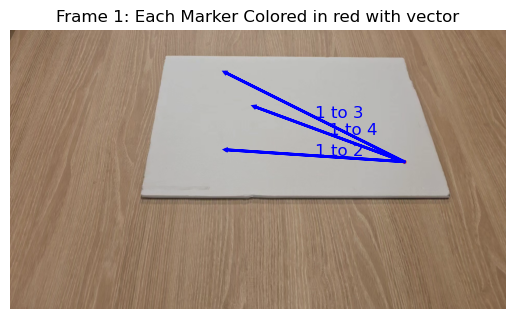

In [4]:
highlighted_pictures = []
marker_list = []

markers, highlighted_frame = heuristic_marker_highlight_for_first_frame(video[0], 
                                                                        threshold=0.5, 
                                                                        ratio_threshold=1.5,
                                                                        marker_size_threshold=40,
                                                                        number_of_markers=4, 
                                                                        picture=True)
highlighted_pictures.append(highlighted_frame)
marker_list.append(markers)
show_picture(highlighted_frame, title='Frame 1: Each Marker Colored in red')
show_picture_with_marker_vector(highlighted_frame, markers, title='Frame 1: Each Marker Colored in red with vector')

In [5]:
for i in range(video.shape[0]-1):
    markers, highlighted_frame = marker_highlight(video[i], previous_marker=marker_list[-1], threshold=0.5, pixel_per_marker=20, picture=True)
    highlighted_pictures.append(highlighted_frame)
    marker_list.append(markers)

/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/SML/utils.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  marker[key] = torch.mean(torch.tensor(segments[key]).to(dtype=torch.float32), dim=0)


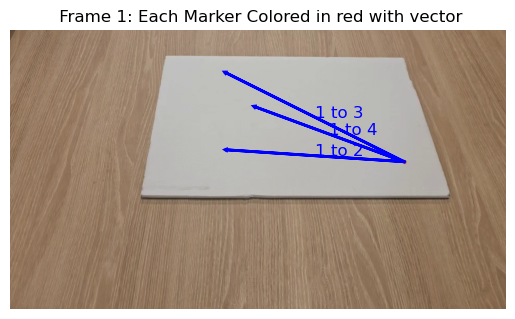

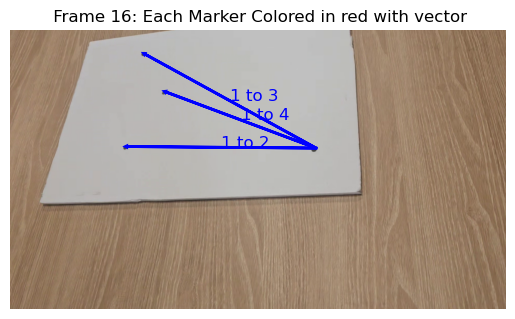

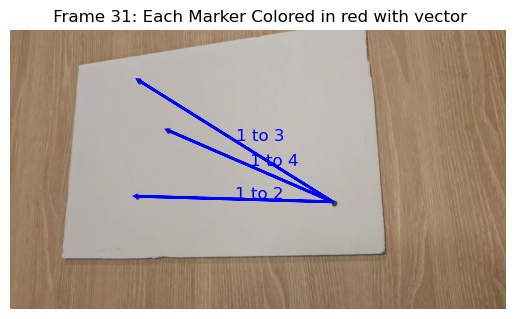

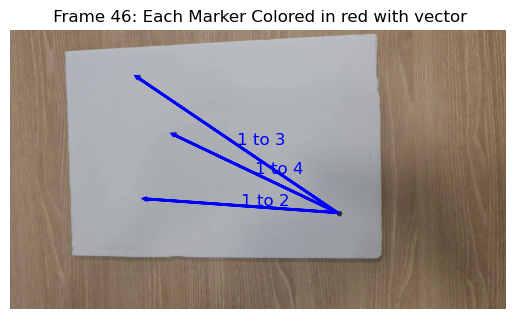

In [6]:
for i in range(0, len(highlighted_pictures), 15):
    show_picture_with_marker_vector(highlighted_pictures[i], marker_list[i], title=f' Frame {i+1}: Each Marker Colored in red with vector')

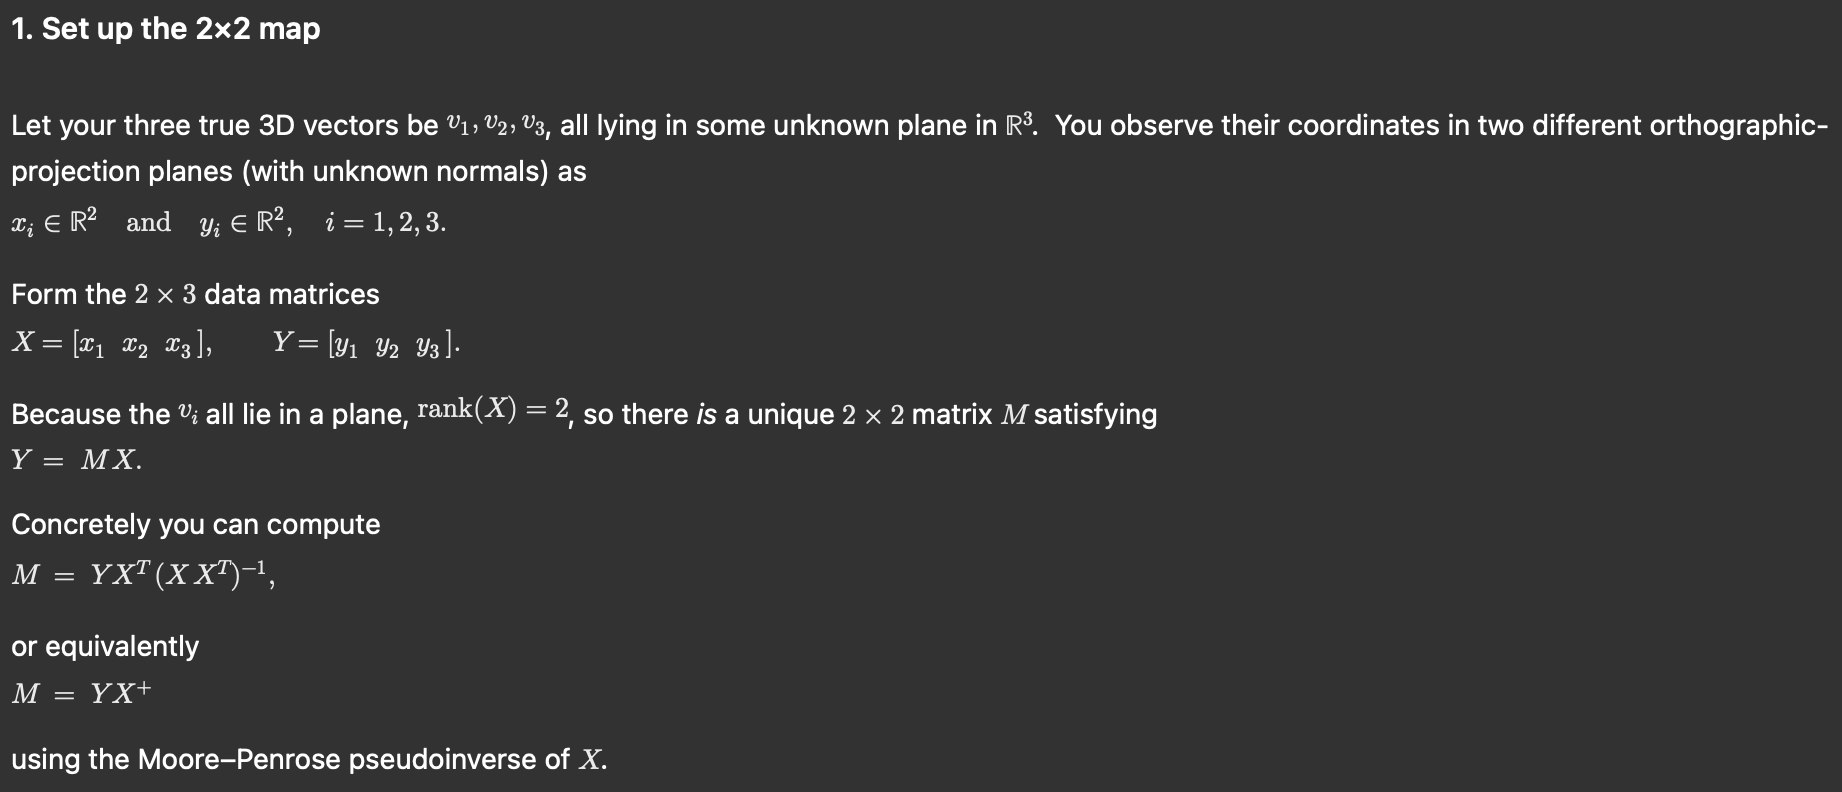
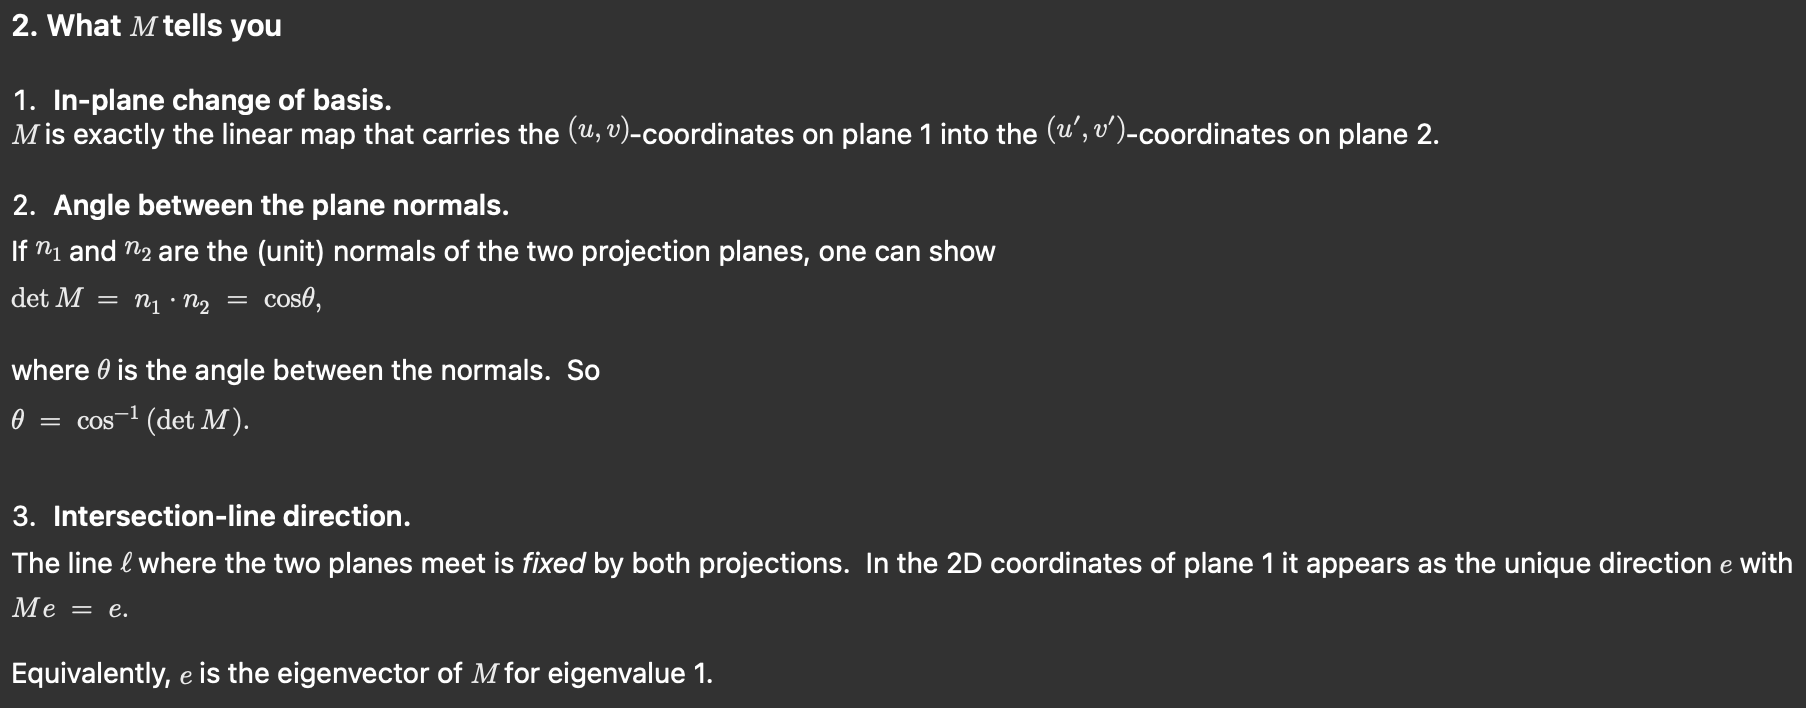
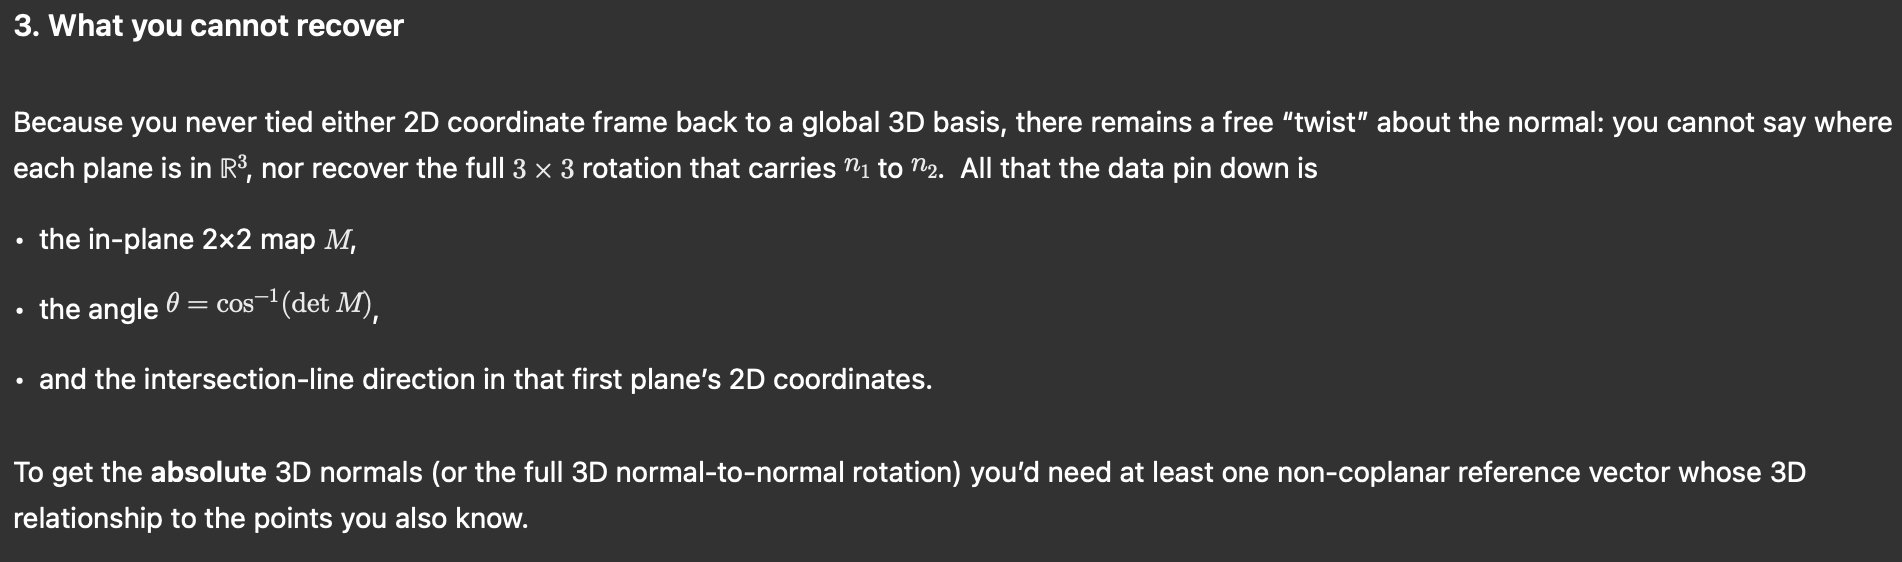

In [15]:
vector_list = []
for marker in marker_list:
    origin = marker["Marker 1"]
    temp_vector_list = []
    for i in range(2, len(list(marker.keys()))+1):
        target = marker[f'Marker {i}']
        vector = target - origin
        temp_vector_list.append(vector)
    vector_list.append(torch.stack(temp_vector_list).t())

In [16]:
M_list = []
angle_list = []
e_list = []
for i in range(1, len(vector_list)):
    M, angle, e = compute_projection_relation_assuming_perfect_2d_camera(vector_list[0], vector_list[i])
    M_list.append(M)
    angle_list.append(angle)
    e_list.append(e)

In [23]:
print(vector_list[0])
print(vector_list[10])

tensor([[ -46.0934, -344.7432, -212.9416],
        [-688.3214, -690.9803, -578.2393]])
tensor([[ -14.4500, -337.2000, -204.4500],
        [-709.8000, -647.6500, -566.4000]])


In [21]:
i = 40
print(M_list[i], torch.det(M_list[i]))
print(angle_list[i])
print(e_list[i])

tensor([[ 1.5541, -0.0555],
        [ 0.0748,  1.0837]]) tensor(1.6883)
tensor(0.)
tensor([0.1195, 0.9928])
